In [5]:
import os, sys, re
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pylab
from pylab import rcParams
from sklearn import mixture
import scipy.stats as sp
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import distance
import scipy.stats as sc
from GMM_trees import *
import itertools
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 5)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [6]:
execfile('GMM_trees.py')

In [7]:
# Angiosperm 
angio_dat = pd.DataFrame(rescale_data(np.array(pd.read_csv('angiosperm_matrix.csv'))))
#angio_dat.transpose().plot(legend = False, linewidth = 3,alpha = 0.5)
angio_vbgmm1 = fit_VBGMM(np.array(angio_dat))

fitting 10 clusters
fitting 20 clusters
fitting 30 clusters
fitting 40 clusters
fitting 50 clusters
fitting 60 clusters
fitting 70 clusters


/Users/sebastianducheneAIr/ipykernel/ipykernel/__main__.py:106: DeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/Users/sebastianducheneAIr/ipykernel/ipykernel/__main__.py:107: DeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/Users/sebastianducheneAIr/ipykernel/ipykernel/__main__.py:111: DeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


In [8]:
angio_vbgmm1

[VBGMM(alpha=0.5, covariance_type='diag', init_params='wmc', min_covar=None,
    n_components=2, n_iter=1000, params='wmc', random_state=None,
    thresh=None, tol=0.001, verbose=False),
 VBGMM(alpha=1.0, covariance_type='spherical', init_params='wmc',
    min_covar=None, n_components=1, n_iter=1000, params='wmc',
    random_state=None, thresh=None, tol=0.001, verbose=False),
   covariance_type           BIC  clusters_used  n_components
 0        diagonal  10125.769919              2             2
 1       spherical   9474.194773              1             1]

- Get means for each dimension, data points that belong to each cluster. 

In [9]:
execfile('GMM_trees.py')
angio_sims = make_pam_sims(data = angio_dat, model = angio_vbgmm1[1], reps = 100)

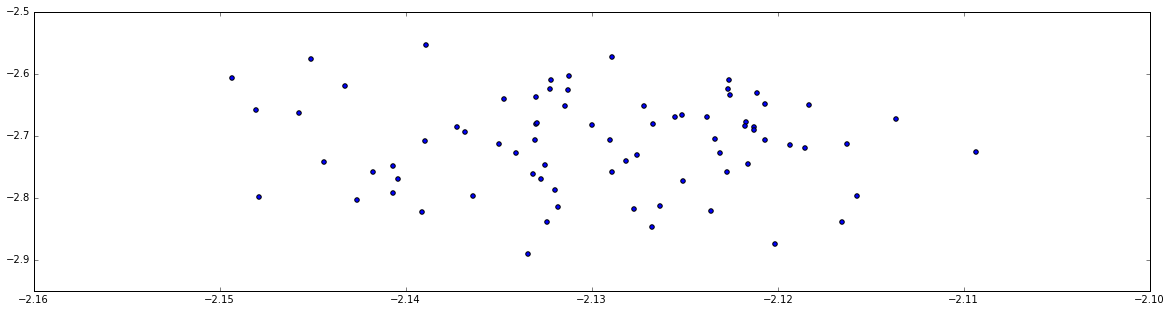

In [10]:
plt.scatter(angio_sims[0].ix[:, 0], angio_sims[0].ix[:, 4])

In [11]:
for r in enumerate(angio_sims):
    r[1].to_csv('sim_pam_angio/sim_'+str(r[0])+'.csv')

In [12]:
poac_data = pd.DataFrame(rescale_data(np.array(pd.read_csv('poaceae_matrix.csv'))))
poac_VBGMM = fit_VBGMM(np.array(poac_data))
poac_VBGMM

fitting 10 clusters
fitting 20 clusters
fitting 30 clusters
fitting 40 clusters
fitting 50 clusters


/Users/sebastianducheneAIr/ipykernel/ipykernel/__main__.py:106: DeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/Users/sebastianducheneAIr/ipykernel/ipykernel/__main__.py:107: DeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/Users/sebastianducheneAIr/ipykernel/ipykernel/__main__.py:111: DeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


[VBGMM(alpha=0.5, covariance_type='diag', init_params='wmc', min_covar=None,
    n_components=2, n_iter=1000, params='wmc', random_state=None,
    thresh=None, tol=0.001, verbose=False),
 VBGMM(alpha=0.5, covariance_type='spherical', init_params='wmc',
    min_covar=None, n_components=2, n_iter=1000, params='wmc',
    random_state=None, thresh=None, tol=0.001, verbose=False),
   covariance_type          BIC  clusters_used  n_components
 0        diagonal  9856.718100              2             2
 1       spherical  9191.580371              2             2]

In [13]:

poac_sims = make_pam_sims(data = poac_data, model = poac_VBGMM[1], reps = 100)

In [14]:
for r in enumerate(poac_sims):
    r[1].to_csv('sim_pam_poac/sim_'+str(r[0])+'.csv')

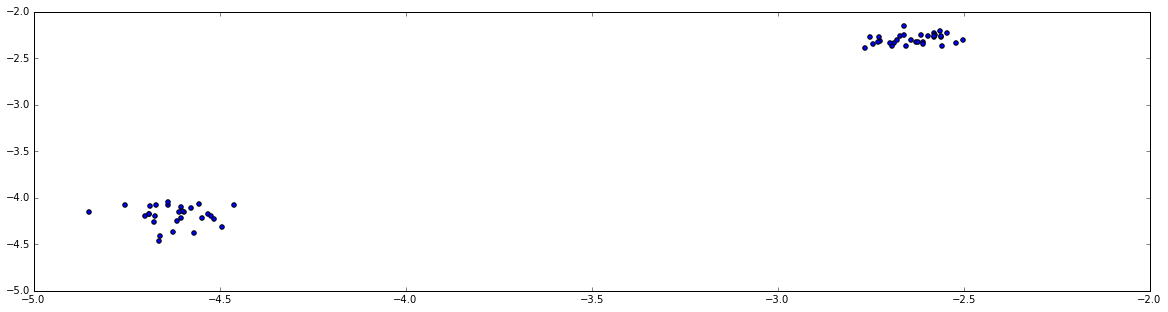

In [15]:
plt.scatter(poac_sims[4].ix[:, 3], poac_sims[4].ix[:, 30])

In [16]:
aster_data = pd.DataFrame(rescale_data(np.array(pd.read_csv('asteraceae_matrix.csv'))))
aster_VBGMM = fit_VBGMM(np.array(aster_data))
aster_VBGMM

fitting 10 clusters
fitting 20 clusters
fitting 30 clusters
fitting 40 clusters
fitting 50 clusters
fitting 60 clusters
fitting 70 clusters


/Users/sebastianducheneAIr/ipykernel/ipykernel/__main__.py:106: DeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/Users/sebastianducheneAIr/ipykernel/ipykernel/__main__.py:107: DeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/Users/sebastianducheneAIr/ipykernel/ipykernel/__main__.py:111: DeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


[VBGMM(alpha=0.5, covariance_type='diag', init_params='wmc', min_covar=None,
    n_components=2, n_iter=1000, params='wmc', random_state=None,
    thresh=None, tol=0.001, verbose=False),
 VBGMM(alpha=0.333333333333, covariance_type='spherical', init_params='wmc',
    min_covar=None, n_components=3, n_iter=1000, params='wmc',
    random_state=None, thresh=None, tol=0.001, verbose=False),
   covariance_type          BIC  clusters_used  n_components
 0        diagonal  3728.271413              2             2
 1       spherical  3465.819914              3             3]

In [17]:
aster_sims = make_pam_sims(aster_data, aster_VBGMM[1], reps = 100)

100


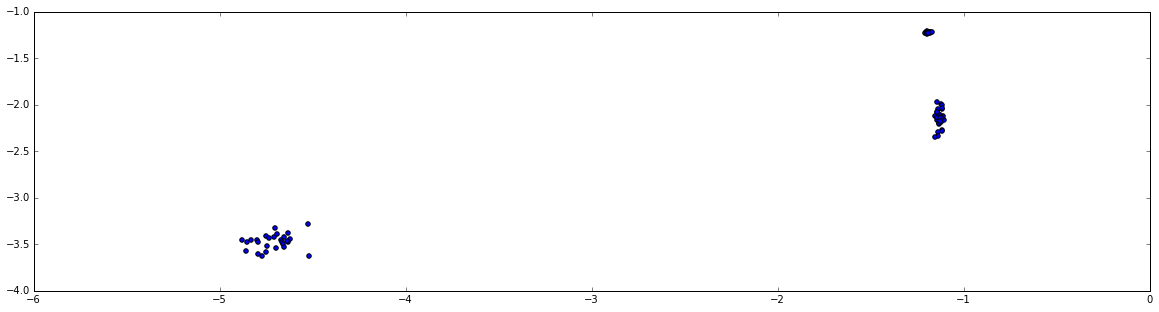

In [18]:
print len(aster_sims)
plt.scatter(aster_sims[3].ix[:, 2], aster_sims[3].ix[:, 5])

In [19]:
for r in enumerate(aster_sims):
    r[1].to_csv('sim_pam_aster/sim_'+str(r[0])+'.csv')

In [20]:
eudicot_dat = pd.DataFrame(rescale_data(np.array(pd.read_csv('eudicot_matrix.csv'))))
eudicot_VBGMM = fit_VBGMM(np.array(eudicot_dat))
eudicot_VBGMM

fitting 10 clusters
fitting 20 clusters
fitting 30 clusters
fitting 40 clusters
fitting 50 clusters
fitting 60 clusters
fitting 70 clusters


/Users/sebastianducheneAIr/ipykernel/ipykernel/__main__.py:106: DeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/Users/sebastianducheneAIr/ipykernel/ipykernel/__main__.py:107: DeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/Users/sebastianducheneAIr/ipykernel/ipykernel/__main__.py:111: DeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


[VBGMM(alpha=0.5, covariance_type='diag', init_params='wmc', min_covar=None,
    n_components=2, n_iter=1000, params='wmc', random_state=None,
    thresh=None, tol=0.001, verbose=False),
 VBGMM(alpha=0.5, covariance_type='spherical', init_params='wmc',
    min_covar=None, n_components=2, n_iter=1000, params='wmc',
    random_state=None, thresh=None, tol=0.001, verbose=False),
   covariance_type          BIC  clusters_used  n_components
 0        diagonal  8520.119843              2             2
 1       spherical  7656.909635              2             2]

In [21]:
eudicot_sims = make_pam_sims(eudicot_dat, eudicot_VBGMM[1], 100)

100


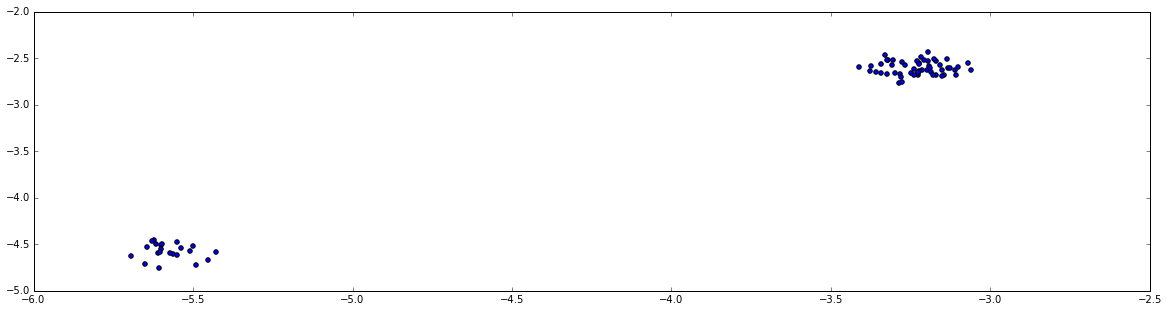

In [22]:
print len(eudicot_sims)
plt.scatter(eudicot_sims[0].ix[:, 1], eudicot_sims[0].ix[:, 5])

In [23]:
for r in enumerate(eudicot_sims):
    r[1].to_csv('sim_pam_eudicot/sim_'+str(r[0])+'.csv')

In [24]:
rosids_data = pd.DataFrame(rescale_data(np.array(pd.read_csv('rosids_matrix.csv'))))
rosids_VBGMM = fit_VBGMM(rosids_data)
rosids_VBGMM

fitting 10 clusters
fitting 20 clusters
fitting 30 clusters
fitting 40 clusters
fitting 50 clusters
fitting 60 clusters
fitting 70 clusters


/Users/sebastianducheneAIr/ipykernel/ipykernel/__main__.py:106: DeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/Users/sebastianducheneAIr/ipykernel/ipykernel/__main__.py:107: DeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/Users/sebastianducheneAIr/ipykernel/ipykernel/__main__.py:111: DeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


[VBGMM(alpha=0.5, covariance_type='diag', init_params='wmc', min_covar=None,
    n_components=2, n_iter=1000, params='wmc', random_state=None,
    thresh=None, tol=0.001, verbose=False),
 VBGMM(alpha=0.2, covariance_type='spherical', init_params='wmc',
    min_covar=None, n_components=5, n_iter=1000, params='wmc',
    random_state=None, thresh=None, tol=0.001, verbose=False),
   covariance_type          BIC  clusters_used  n_components
 0        diagonal  7218.579209              2             2
 1       spherical  6325.082490              4             5]

In [25]:
rosids_sims = make_pam_sims(rosids_data, rosids_VBGMM[1], 100)

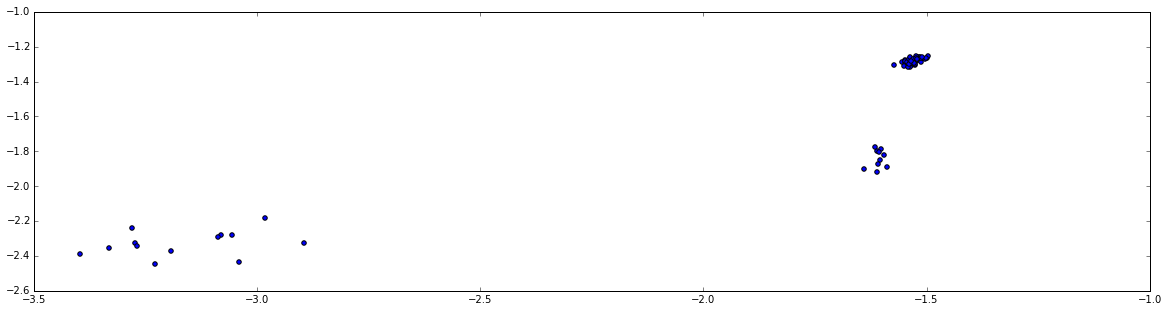

In [26]:
plt.scatter(rosids_sims[10].ix[:, 12], rosids_sims[10].ix[:, 11])

In [27]:
for r in enumerate(rosids_sims):
    r[1].to_csv('sim_pam_rosids/sim_'+str(r[0])+'.csv')

In [28]:
wow = fit_data(rosids_sims[0])

NameError: name 'fit_data' is not defined

In [ ]:
import multiprocessing
from multiprocessing import Pool

In [ ]:
execfile('analyse_pam_runs.py')

In [44]:
pd.DataFrame(s)

,0,1
0,vbgmm_shperical,2
1,vbgmm_shperical,2
2,vbgmm_shperical,2
3,vbgmm_shperical,2
4,vbgmm_shperical,2
5,vbgmm_shperical,2
6,vbgmm_shperical,2
7,vbgmm_shperical,2
8,vbgmm_shperical,2
9,vbgmm_shperical,2
